In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
infol = '/Users/irffanalahi/Research/Research_code/gitignorefolder/MHB_per_read/softreadcounting/testtheidea/softRD_pileup/HardRDdevelop/corr/5g/mincpg3'
infiles = os.listdir(infol)

if '.ipynb_checkpoints' in infiles:
    infiles.remove('.ipynb_checkpoints')
    
if '.DS_store' in infiles:
    infiles.remove('.DS_store')

KeyError: 'CD4_real'

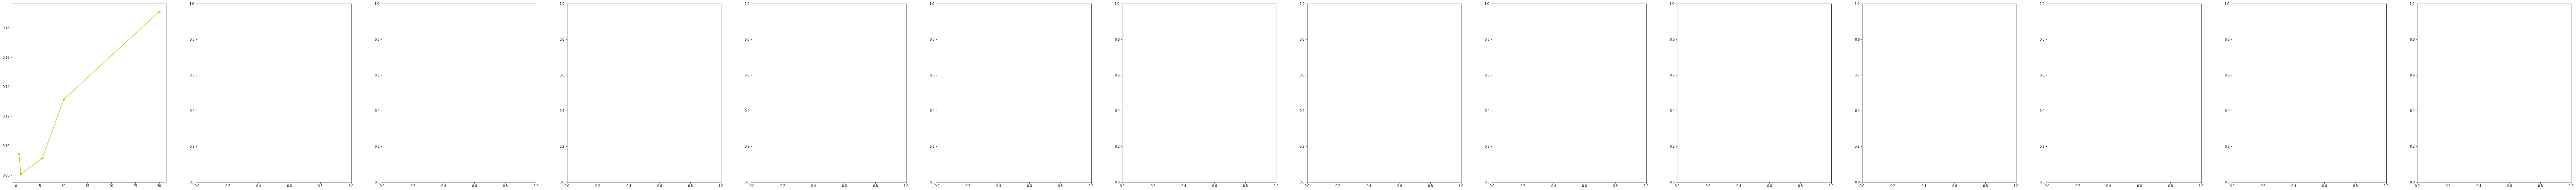

In [3]:
dfs = []
cells = []
for i in range(len(infiles)):
    file_name = infiles[i]
    file = infol + '/' + file_name
    data = pd.read_csv(file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    
    df['Index Number'] = [int(i.split('insilmix')[-1]) for i in df.index]

    df.sort_values(['Index Number'], inplace=True)
    df = df.drop('Index Number', axis=1)
    dfs.append(df)
    
    if i == 0:
        for cell in df.columns:
            if '_real' not in cell:
                cells.append(cell)
            
color=['y', 'g', 'b', 'r', 'black', 'violet', 'orange', 'brown', 'purple']

fig, axs = plt.subplots(1, len(cells), figsize=(len(cells) * 10, 10))

for i, cell in enumerate(cells):
    for j, df in enumerate(dfs):
        x = np.array(df[cell + '_real'])
        y = np.array(df[cell])
        
        c = color[j]
        x, y = zip(*sorted(zip(x, y)))
        axs[i].plot(x, y, label=infiles[j], c=c, marker='o', mew=2, ms=5, fillstyle='none')
        
    axs[i].invert_xaxis()
    axs[i].set_title(cell)
    axs[i].set_xlabel('Expected (%)', fontsize=18)
    axs[i].set_ylabel('Observed (%)', fontsize=18)
    # axs[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    # axs[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))

plt.legend(loc=(1.03, 0.7), fontsize=14)

In [ ]:
fig.savefig(infol+'_plot_all_cells.pdf',dpi=300, bbox_inches='tight')